## Assignment 4 - Web and API
#### Research Question: Which data science tool is more popular in the data science/statistics community pandas or R?
INST447-ESG1 Spring 2021 - Farmer<br>
Dillon Morley
UID: 114735850

**Resources:<br>**
- https://api.stackexchange.com/docs
- https://api.stackexchange.com/docs/tags-by-name
- https://requests.readthedocs.io/en/master/

**Sources:**
- Stack- Pandas: https://stackoverflow.com/tags/pandas
- Stack - R: https://stackoverflow.com/tags/r
- Stats - Pandas: https://stats.stackexchange.com/?tags=pandas
- Stats - R: https://stats.stackexchange.com/?tags=r
- Data Science - Pandas: https://datascience.stackexchange.com/tags/pandas
- Data Science - R: https://datascience.stackexchange.com/tags/r

In [27]:
#Import modules needed for our analysis.
import pandas as pd
import numpy as np
import requests
from pandas.io.json import json_normalize #special package in pandas
import json

#### Step 1: Create Requests Using Stack Exchange API
The following lines of code create a request using the the Stack Exchange API to request information from the six sites listed under sources. The API_requests portion of the code is a list that contains all the response objects. The end of the code filters through this list and prints the status code, headers, and encoding for each response object.

In [366]:
# Step - 1
# use the stackexchange API for pandas across the three sites (stack, stat, DataScience)
#     You will need to do the same thing for 'R'....so you will have a total of 6 requests.
stackPandasRequest = requests.get('https://api.stackexchange.com/tags/pandas/info?site=stackoverflow.com') 
statsPandasRequest = requests.get('https://api.stackexchange.com/tags/pandas/info?site=stats.stackexchange.com')
dataSciencePandasRequest = requests.get('https://api.stackexchange.com/tags/pandas/info?site=datascience.stackexchange.com')
# You need to do the same for R  
stackRrequest = requests.get('https://api.stackexchange.com/tags/r/info?site=stackoverflow.com') 
statsRrequest = requests.get('https://api.stackexchange.com/tags/r/info?site=stats.stackexchange.com')
datascienceRrequest = requests.get('https://api.stackexchange.com/tags/r/info?site=datascience.stackexchange.com')
# Print out status code, headers, encoding
API_requests = [stackPandasRequest,statsPandasRequest,dataSciencePandasRequest,
                stackRrequest,statsRrequest,datascienceRrequest]
for item in API_requests:
    print(' Status Code:',item.status_code,'\n','Headers:',item.headers,'\n','Encoding: ',item.encoding,'\n')

 Status Code: 200 
 Headers: {'cache-control': 'private', 'content-length': '146', 'content-type': 'application/json; charset=utf-8', 'content-encoding': 'gzip', 'strict-transport-security': 'max-age=15552000', 'access-control-allow-origin': '*', 'access-control-allow-methods': 'GET, POST', 'access-control-allow-credentials': 'false', 'x-content-type-options': 'nosniff', 'x-request-guid': 'a7556b6d-cecb-4e62-8ca1-b24565b5c18d', 'set-cookie': 'prov=c754f9ca-2355-4c65-9c63-2cb860c3a4aa; expires=Fri, 01 Jan 2055 00:00:00 GMT; domain=.stackexchange.com; path=/; secure; samesite=none; httponly', 'content-security-policy': "upgrade-insecure-requests; frame-ancestors 'self' https://stackexchange.com", 'date': 'Mon, 03 May 2021 21:24:51 GMT'} 
 Encoding:  utf-8 

 Status Code: 200 
 Headers: {'cache-control': 'private', 'content-length': '143', 'content-type': 'application/json; charset=utf-8', 'content-encoding': 'gzip', 'strict-transport-security': 'max-age=15552000', 'access-control-allow-o

#### Step 2: Saving the Output, and Converting it to a JSON Object
The following lines of code write our output from our various requests to a new json file labeled, "stackexchange.json". The second portion of this code creates a JSON object using our different requests.

In [367]:
# Step - 2
# Save the text output from each and print
text_file = open("stackexchange.json", "w")

text_file.write(stackPandasRequest.text)
text_file.write(statsPandasRequest.text)
text_file.write(dataSciencePandasRequest.text)
text_file.write(stackRrequest.text)
text_file.write(statsRrequest.text)
text_file.write(datascienceRrequest.text)

text_file.close()

#create a json object for each of the 'pandas' requests and for the 'R' requests
stackRequestJson = json.loads(stackPandasRequest.text)
statRequestJson = json.loads(statsPandasRequest.text)
DataSciencePandas = json.loads(dataSciencePandasRequest.text)
# R...
stackRrequestJson = json.loads(stackRrequest.text)
statsRrequestJson = json.loads(statsRrequest.text)
datascienceRrequestJson = json.loads(datascienceRrequest.text)

#### Step 2 Continued:
This section of code prints our JSON objects for pandas. Using the 'json.dumps' method we can set our indent=4 and sort_keys=True to prepare our objects for pandas.

In [368]:
# Step 2 continued...

# print the json objects for pandas, make sure to set an indentation of 4 and sort the keys - this can
#    be done in the 'json.dumps' method
# Debugging help
# print(stack...Request.text)
# print(stack...Request.json())
# print(json.dumps(stack...RequestJson...)
print(json.dumps(stackRequestJson,indent=4,sort_keys=True))
print(json.dumps(statRequestJson,indent=4,sort_keys=True))
print(json.dumps(DataSciencePandas,indent=4,sort_keys=True))

{
    "has_more": false,
    "items": [
        {
            "count": 199384,
            "has_synonyms": false,
            "is_moderator_only": false,
            "is_required": false,
            "name": "pandas"
        }
    ],
    "quota_max": 300,
    "quota_remaining": 173
}
{
    "has_more": false,
    "items": [
        {
            "count": 129,
            "has_synonyms": false,
            "is_moderator_only": false,
            "is_required": false,
            "name": "pandas"
        }
    ],
    "quota_max": 300,
    "quota_remaining": 173
}
{
    "has_more": false,
    "items": [
        {
            "count": 1029,
            "has_synonyms": false,
            "is_moderator_only": false,
            "is_required": false,
            "name": "pandas"
        }
    ],
    "quota_max": 300,
    "quota_remaining": 173
}


In [369]:
# Step 2 continued...

# print the json objects for R, make sure to set an indentation of 4 and sort the keys - this can
#    be done in the 'json.dumps' method
# Debugging help
# print(stack...Request.text)
# print(stack...Request.json())
# print(json.dumps(stack...RequestJson...)
print(json.dumps(stackRrequestJson,indent=4,sort_keys=True))
print(json.dumps(statsRrequestJson,indent=4,sort_keys=True))
print(json.dumps(datascienceRrequestJson,indent=4,sort_keys=True))


{
    "has_more": false,
    "items": [
        {
            "count": 400225,
            "has_synonyms": true,
            "is_moderator_only": false,
            "is_required": false,
            "name": "r"
        }
    ],
    "quota_max": 300,
    "quota_remaining": 173
}
{
    "has_more": false,
    "items": [
        {
            "count": 25237,
            "has_synonyms": true,
            "is_moderator_only": false,
            "is_required": false,
            "name": "r"
        }
    ],
    "quota_max": 300,
    "quota_remaining": 173
}
{
    "has_more": false,
    "items": [
        {
            "count": 1294,
            "has_synonyms": false,
            "is_moderator_only": false,
            "is_required": false,
            "name": "r"
        }
    ],
    "quota_max": 300,
    "quota_remaining": 171
}


#### Step 3: Flatten our JSON Objects into Dataframes
This section of our code takes our JSON objects that were created in step 2 and converts them into their own individual dataframes, and prints out the dataframe with it's name and shape.

In [51]:
# Step - 3
# flatten json into a data frame for each and add the 'Site' and 'Tag' used
stackRequest_df = pd.json_normalize(stackRequestJson['items'])
stackRequest_df["Site"] = "Stack"
stackRequest_df["Tag"] = "Pandas"
# count the number of rows
print('Stack Pandas DF: ')
print('Shape: ',stackRequest_df.shape)

# print first few rows
print(stackRequest_df.head())
print(' ')

# do the other Pandas and all of the R ones as well

#STATS PANDAS
statRequest_df = pd.json_normalize(statRequestJson['items'])
statRequest_df["Site"] = "Stats"
statRequest_df["Tag"] = "Pandas"
print('Stat Pandas DF: ')
print('Shape: ',statRequest_df.shape)
print(statRequest_df.head())
print(' ')

#DATA SCIENCE PANDAS
DataSciencePandas_df = pd.json_normalize(DataSciencePandas['items'])
DataSciencePandas_df["Site"] = "Data Science"
DataSciencePandas_df["Tag"] = "Pandas"
print('Data Science Pandas DF: ')
print('Shape: ',DataSciencePandas_df.shape)
print(DataSciencePandas_df.head())
print(' ')

#STACK R
stackR_df = pd.json_normalize(stackRrequestJson['items'])
stackR_df["Site"] = "Stack"
stackR_df["Tag"] = "R"
print('Stack R DF: ')
print('Shape: ',stackR_df.shape)
print(stackR_df.head())
print(' ')

#STATS R
statR_df = pd.json_normalize(statsRrequestJson['items'])
statR_df["Site"] = "Stats"
statR_df["Tag"] = "R"
print('Stat R DF: ')
print('Shape: ',statR_df.shape)
print(statR_df.head())
print(' ')

#DATA SCIENCE R
DataScienceR_df = pd.json_normalize(datascienceRrequestJson['items'])
DataScienceR_df["Site"] = "Data Science"
DataScienceR_df["Tag"] = "R"
print('Data Science R DF: ')
print('Shape: ', DataScienceR_df.shape)
print(DataScienceR_df.head())
print(' ')

Stack Pandas DF: 
Shape:  (1, 7)
   has_synonyms  is_moderator_only  is_required   count    name   Site     Tag
0         False              False        False  199373  pandas  Stack  Pandas
 
Stat Pandas DF: 
Shape:  (1, 7)
   has_synonyms  is_moderator_only  is_required  count    name   Site     Tag
0         False              False        False    129  pandas  Stats  Pandas
 
Data Science Pandas DF: 
Shape:  (1, 7)
   has_synonyms  is_moderator_only  is_required  count    name          Site  \
0         False              False        False   1029  pandas  Data Science   

      Tag  
0  Pandas  
 
Stack R DF: 
Shape:  (1, 7)
   has_synonyms  is_moderator_only  is_required   count name   Site Tag
0          True              False        False  400206    r  Stack   R
 
Stat R DF: 
Shape:  (1, 7)
   has_synonyms  is_moderator_only  is_required  count name   Site Tag
0          True              False        False  25235    r  Stats   R
 
Data Science R DF: 
Shape:  (1, 7)
   has_syn

#### Step 4: Create our Merged Dataframe
Now that we have seperate dataframes for each site and tag, we are going to create a combined dataframe that contains all the data. First, we are going to create a list called "dataframes" that contains all the separate dataframes. Next, we are going to use the "Concat" function in pandas to merge all of our datasets together. Next, we are going to drop the columns 'has_synonyms','is_moderator_only','is_required', and 'name'because they aren't relevant to our research question. The last step in this section of code is to reset our index, and reorder our column names and label this new dataframe as "cleaned_df".

In [61]:
# Additional steps, downloads, concat dataframes, graphs......anything you would need to tell the story
#. e.g. concat the dataframes together
#.   create a barchart showing the differences between Pandas and R total
#.   plot the number of posts per site for Pandas and R
dataframes = [stackRequest_df, statRequest_df, DataSciencePandas_df,stackR_df,statR_df,DataScienceR_df]
final_df = pd.concat(dataframes)
final_df = final_df.drop(['has_synonyms','is_moderator_only','is_required','name'],axis=1)
index_fix = final_df.reset_index(inplace=True)
index_fix = final_df.drop('index',axis=1)
cleaned_df = index_fix[['Site','Tag','count']]
cleaned_df

,Site,Tag,count
0,Stack,Pandas,199373
1,Stats,Pandas,129
2,Data Science,Pandas,1029
3,Stack,R,400206
4,Stats,R,25235
5,Data Science,R,1294


#### Step 6: Analyze the Totals for Each Tag
This line of code creates a new dataframe labeled "totals_df," which takes the sum of all posts that are either "Pandas" or "R". This dataframe allows us to see which tool has more questions.

In [341]:
totals_df = cleaned_df.groupby('Tag').sum()
totals_df = totals_df.reset_index()
totals_df

,Tag,count
0,Pandas,200531
1,R,426735


#### Step 7: Visualize our Tag Differences
The following lines of code takes our "totals_df" and visualizes it into a simple bar chart. I have set the colors as red to depict pandas, and blue to depict R. As you can see in the following visual, there are more than double the amount of questions pertaining to R as there is Pandas.

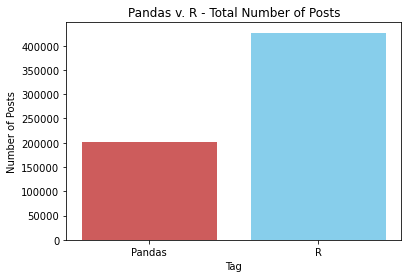

In [370]:
#Creating a bar chart to show the differences between Pandas and R
import matplotlib.pyplot as plt
colors = ['indianred','skyblue']
plt.bar(totals_df['Tag'],totals_df['count'],color=colors);
plt.xlabel('Tag'); #Labels our x-axis
plt.ylabel('Number of Posts'); #Labels our y-axis
plt.title('Pandas v. R - Total Number of Posts');

#### Step 8: Create Separate Dataframes to Analyze Each Site
The following lines of code create new dataframes pertaining to each website that we analyzed and prints them out.
The code creates three dataframes labeled:
- **"stack"**: contains the count of questions on stackoverflow.com for both Pandas and R.
- **"stats"**: contains the count of questions on stats.stackexchange.com for both Pandas and R.
- **"data_sci"**: contains the count of questions on datascience.stackexchange.com for both Pandas and R.

In [359]:
stack = cleaned_df.loc[cleaned_df['Site']=='Stack']
stats = cleaned_df.loc[cleaned_df['Site']=='Stats']
data_sci = cleaned_df.loc[cleaned_df['Site']=='Data Science']
print(stack)
print('')
print(stats)
print('')
print(data_sci)

    Site     Tag   count
0  Stack  Pandas  199373
3  Stack       R  400206

    Site     Tag  count
1  Stats  Pandas    129
4  Stats       R  25235

           Site     Tag  count
2  Data Science  Pandas   1029
5  Data Science       R   1294


#### Step 9: Visualizing the Breakdown of Questions Per Each Site
The following code creates a figure that is 3 separate graphs, with a figure size of (10,15). Each graph corresponds to the three separate subcommunities we analyzed (Stack, Stats, and DataScience). For each subcommunity, the number of questions about Pandas is depicted in red, and the number of questions about R is depicted in blue.

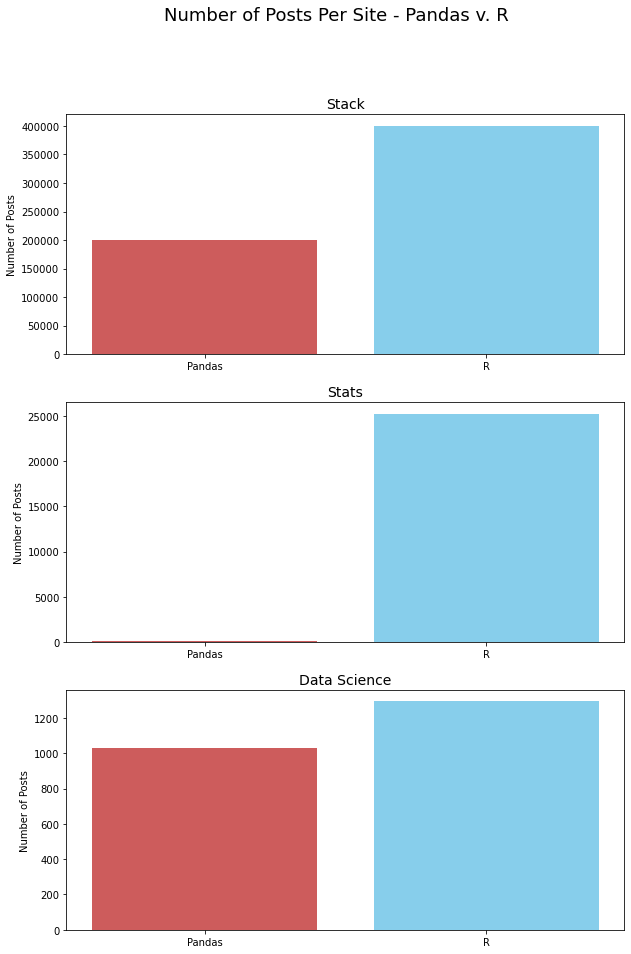

In [364]:
fig, axs = plt.subplots(3,figsize=(10,15));
fig.suptitle('Number of Posts Per Site - Pandas v. R',size='18');
axs[0].bar(stack['Tag'],stack['count'],color=colors);
axs[0].set_title('Stack',size='14')
axs[0].set_ylabel('Number of Posts');
axs[1].bar(stats['Tag'],stats['count'],color=colors);
axs[1].set_title('Stats',size='14')
axs[1].set_ylabel('Number of Posts');
axs[2].bar(data_sci['Tag'],data_sci['count'],color=colors);
axs[2].set_title('Data Science',size='14')
axs[2].set_ylabel('Number of Posts');

#### Explanation of Results:
The goal of this assignment was analyze how the number of questions regarding Pandas (a data science tool) and R (a statistical tool) differed between three subcommunities. Stackoverflow is a community for programmers to ask questions, stats.stackexchange is a Q&A community for people interested in statistics, and datascience.stackexchange is a Q&A community for people interested in data science. 

The first visual shows the comparison between Pandas and R tagged questions on all three communities. As you can see (Step 7), there were more than double the amount of posts tagged with R as opposed to posts tagged with Pandas. R is definitely the more popular tool within these subcommunities. The next question I wanted to explore more was which tool was more popular for the individual communities. I initially anticipated the stats community to be dominated by R questions, however for stackoverflow and data science communities I expect the opposite.

After separating our data by community, I visualized the breakdown of each community in Step 9. As you can see in the visual in Step 9, there are more questions tagged with R for every subcommunity. The stack community had 199,373 questions tagged with Pandas and 400,206 questions tagged with R. The stats community had 129 questions tagged with Pandas and 25,235 tagged with R. The data science community had 1,029 questions tagged with Pandas and 1,294 questions tagged with R. 

To conclude, R is way more popular than Pandas when looking at the stack, stats, and data science subcommunities. The stack community is the most popular out of the three with 599,579 total questions, whereas the data science had the least amount of questions with 2,323 questions.

#### Limitations:
As with all data, there are limitations. When using an API there is always limitations because the data is always being updated. What we analyzed today could be slighlty different tomorrow. I think it is also important to note that when using an API to scrape data from a Q&A community, you are subject to human error. What I mean by this is that there could be endless amounts of questions relating to either tool but was improperly tagged by the user or not tagged at all. 